In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
from keras.models import load_model

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
!pip install --upgrade gdown

  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3


In [ ]:
!gdown 1M41E-t6i6GFhhrLzTTkOlnTO9bBIg6U6

Downloading...
From (original): https://drive.google.com/uc?id=1M41E-t6i6GFhhrLzTTkOlnTO9bBIg6U6
From (redirected): https://drive.google.com/uc?id=1M41E-t6i6GFhhrLzTTkOlnTO9bBIg6U6&confirm=t&uuid=19e935e1-b01f-40a7-b082-b92075ef495c
To: /content/zomato.csv
100% 574M/574M [00:06<00:00, 87.8MB/s]


In [ ]:
df = pd.read_csv('/content/zomato.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [ ]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [ ]:
df.online_order.value_counts()

online_order
Yes    30444
No     21273
Name: count, dtype: int64

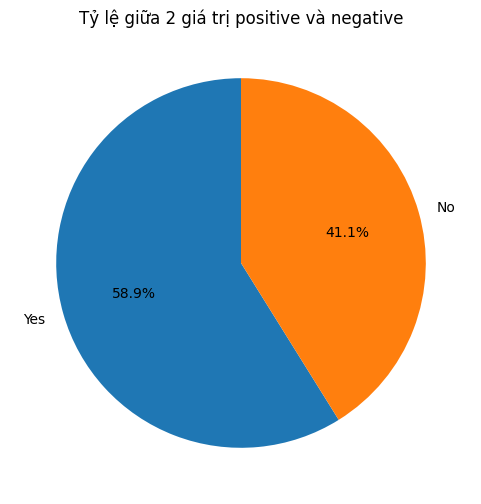

In [ ]:
value_counts = df['online_order'].value_counts()

# Plot a pie chart
plt.figure(figsize=(6, 6))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Tỷ lệ giữa 2 giá trị positive và negative')
plt.show()

In [ ]:
count_yes = df['online_order'].value_counts()['Yes']
count_no = df['online_order'].value_counts()['No']

# Tìm số lượng mẫu muốn loại bỏ từ nhãn "Yes" để cân bằng với nhãn "No"
undersampled_count = min(count_yes, count_no)

# Lấy ra các mẫu ngẫu nhiên từ nhãn "Yes"
undersampled_yes = df[df['online_order'] == 'Yes'].sample(n=undersampled_count, random_state=42)

# Lấy ra tất cả các mẫu từ nhãn "No"
no_samples = df[df['online_order'] == 'No']

# Kết hợp các mẫu từ nhãn "Yes" đã được undersampled với tất cả các mẫu từ nhãn "No"
data = pd.concat([undersampled_yes, no_samples])

# Trộn lại dữ liệu để không có sự căn cứ nào trong việc chọn mẫu
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

# Kiểm tra kết quả
print(data['online_order'].value_counts())

online_order
No     21273
Yes    21273
Name: count, dtype: int64


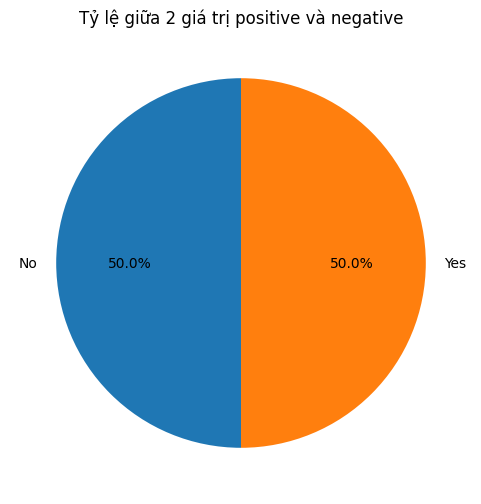

In [ ]:
value_counts = data['online_order'].value_counts()

# Plot a pie chart
plt.figure(figsize=(6, 6))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Tỷ lệ giữa 2 giá trị positive và negative')
plt.show()

In [ ]:
print(data['online_order'].dtype)

object


In [ ]:
import string
def processTitle(title):
    # Chuyển đổi chữ thường
    title = title.lower()
    # Loại bỏ các ký tự không phải là số hoặc chữ
    title = re.sub(r'[^a-zA-Z0-9\s]', '', title)
    # Loại bỏ khoảng trắng dư thừa
    title = re.sub(r'\s\s+', ' ', title)
    # Loại bỏ khoảng trắng đơn ở đầu tiên của tiêu đề
    title = title.lstrip(' ')
    return title

In [ ]:
w_tokenizer=nltk.tokenize.WhitespaceTokenizer()
lemmatizer=WordNetLemmatizer() # Xóa bỏ các hậu tố
def lemmatize_text(text):
    return[lemmatizer.lemmatize(w)for w in w_tokenizer.tokenize(text)]

In [ ]:
# clean dataframe's text column
data['text'] = data['reviews_list'].apply(processTitle)
# preview some cleaned tweets
data['text'].head()

0    rated 30 ratedn an average place at best there...
1    rated 30 ratedn have passed by this restaurant...
2    rated 50 ratedn nice place for some andhra foo...
3    rated 50 ratedn really very ambience nice musi...
4                                                     
Name: text, dtype: object

In [ ]:
dataset = data[['text', 'online_order']]

In [ ]:
stopwords_english = stopwords.words('english')
print(stopwords_english)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
from textblob import Word
def text_process(raw_text):
    # Check characters to see if they are in punctuation
    nopunc = [char for char in list(raw_text) if char not in string.punctuation]
    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)

    # remove all stopwords
    return [word for word in nopunc.lower().split() if word.lower() not in stopwords_english]

def remove_words(word_list):
    remove = ['i','me','my','flight','hour','minute','wa','airline','bag','plane','cancelled','myself','we','our','ours','ourselves','you',"you're","you've","you'll","you'd",'your','yours','yourself','yourselves','he','him','his','himself','she',"she's",'her','hers','herself','it',"it's",'its','itself','they','them','their','theirs','themselves','what','which','who','whom','this','that',"that'll",'these','those','am','is','are','was','were','be','been','being','have','has','had','having','do','does','did','doing','a','an','the','and','but','if','or','because','as','until','while','of','at','by','for','with','about','against','between','into','through','during','before','after','above','below','to','from','up','down','in','out','on','off','over','under','again','further','then','once','here','there','when','where','why','how','all','any','both','each','few','more','most','other','some','such','...','“','”','’','...']
    return [w for w in word_list if w not in remove]

In [ ]:
# tokenize message column and create a column for tokens
dataset['temp']=dataset['text'].apply(text_process)
dataset['tokens']=dataset['temp'].apply(remove_words)

dataset[['text','online_order','temp','tokens']]

,text,online_order,temp,tokens
0,rated 30 ratedn an average place at best there...,No,"[rated, 30, ratedn, average, place, best, comp...","[rated, 30, ratedn, average, place, best, comp..."
1,rated 30 ratedn have passed by this restaurant...,Yes,"[rated, 30, ratedn, passed, restaurant, many, ...","[rated, 30, ratedn, passed, restaurant, many, ..."
2,rated 50 ratedn nice place for some andhra foo...,No,"[rated, 50, ratedn, nice, place, andhra, foodt...","[rated, 50, ratedn, nice, place, andhra, foodt..."
3,rated 50 ratedn really very ambience nice musi...,Yes,"[rated, 50, ratedn, really, ambience, nice, mu...","[rated, 50, ratedn, really, ambience, nice, mu..."
4,,No,[],[]
...,...,...,...,...
42541,rated 30 ratedn quantity was less according to...,Yes,"[rated, 30, ratedn, quantity, less, according,...","[rated, 30, ratedn, quantity, less, according,..."
42542,rated 10 ratedn ordered chicken varattiyath an...,Yes,"[rated, 10, ratedn, ordered, chicken, varattiy...","[rated, 10, ratedn, ordered, chicken, varattiy..."
42543,rated 40 ratedn we just wandered into chocolat...,No,"[rated, 40, ratedn, wandered, chocolate, junct...","[rated, 40, ratedn, wandered, chocolate, junct..."
42544,rated 10 rated 40 rated 20 rated 40 rated 30 r...,Yes,"[rated, 10, rated, 40, rated, 20, rated, 40, r...","[rated, 10, rated, 40, rated, 20, rated, 40, r..."


In [ ]:
dataset['clean_title'] = [' '.join(map(str, l)) for l in dataset['tokens']]
dataset=dataset.drop(columns=['text','temp'])
dataset.head()

,online_order,tokens,clean_title
0,No,"[rated, 30, ratedn, average, place, best, comp...",rated 30 ratedn average place best complaints ...
1,Yes,"[rated, 30, ratedn, passed, restaurant, many, ...",rated 30 ratedn passed restaurant many times t...
2,No,"[rated, 50, ratedn, nice, place, andhra, foodt...",rated 50 ratedn nice place andhra foodtheir da...
3,Yes,"[rated, 50, ratedn, really, ambience, nice, mu...",rated 50 ratedn really ambience nice music dan...
4,No,[],


# Build Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
import pickle as pkl
from sklearn.preprocessing import LabelEncoder

In [ ]:
from tensorflow.keras.layers import Input, Embedding, Bidirectional, LSTM, Dropout, LayerNormalization, Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
nltk.download('punkt')
def count_tokens(text):
    tokens = nltk.word_tokenize(text)
    return len(tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
dataset['token_count'] = dataset['temp_title'].apply(count_tokens)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-24-e05a45e809f2>", line 1, in <cell line: 1>
    dataset['token_count'] = dataset['temp_title'].apply(count_tokens)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/series.py", line 4630, in apply
    return SeriesApply(self, func, convert_dtype, args, kwargs).apply()
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/apply.py", line 1025, in apply
    return self.apply_standard()
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/apply.py", line 1076, in apply_standard
    mapped = lib.map_infer(
  File "pandas/_libs/lib.pyx", line 2834, in pandas._libs.lib.map_infer
  File "<ipython-input-23-baed1d852119>", line 3, in count_tokens
    tokens = nltk.word_tokenize(text)
  File "/usr/local/lib/python3.10/dist-packages/nltk/tokenize/__init__.py"

TypeError: object of type 'NoneType' has no len()

In [ ]:
dataset['token_count'].describe()

count    42546.000000
mean      1408.722630
std       3918.510055
min          0.000000
25%         44.000000
50%        172.000000
75%        616.000000
max      81581.000000
Name: token_count, dtype: float64

In [ ]:
text = dataset['clean_title'].values
label = dataset['online_order'].values

In [ ]:
label_dict = {'No': 0, 'Yes': 1}
label_idx = [label_dict[i] for i in label]
label_tf = tf.keras.utils.to_categorical(label_idx, num_classes=2, dtype='float32')

In [ ]:
maxlen_vector = 1500
tokenizer_data = Tokenizer(oov_token='<OOV>', filters='', split=' ')
tokenizer_data.fit_on_texts(text)
tokenizer_data_text = tokenizer_data.texts_to_sequences(text)
vec_data = pad_sequences(tokenizer_data_text, padding='post', maxlen=maxlen_vector)

In [ ]:
pkl.dump(tokenizer_data, open('tokenizer_data.pkl', 'wb'))

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(vec_data, label_tf, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print(f'Số quan sát tập train: {len(X_train)}')
print(f'Số quan sát tập validation: {len(X_val)}')
print(f'Số quan sát tập test: {len(X_test)}')

Số quan sát tập train: 27228
Số quan sát tập validation: 8510
Số quan sát tập test: 6808


In [ ]:
data_vocab_size = len(tokenizer_data.word_index)+1
print(f'Vocab size: {data_vocab_size}')

Vocab size: 185704


In [ ]:
def model():
    dropout_threshold = 0.2
    initializer = tf.keras.initializers.GlorotNormal()
    input_layer = Input(shape=(maxlen_vector,))

    # Tạo Embedding để làm input layer
    feature = Embedding(input_dim=data_vocab_size, output_dim=32, input_length=maxlen_vector,
                        embeddings_initializer='GlorotNormal')(input_layer)

    # BiLSTM
    bi_lstm_feature = Bidirectional(LSTM(units=32, dropout=dropout_threshold,
                                         kernel_initializer=initializer))(feature)
    bi_lstm_feature = Dropout(dropout_threshold)(bi_lstm_feature)
    bi_lstm_feature = LayerNormalization()(bi_lstm_feature)

    # Dense layer cho phân loại
    classifier = Dense(2, activation='softmax')(bi_lstm_feature)

    # Xây dựng mô hình cuối cùng
    model = tf.keras.Model(inputs=input_layer, outputs=classifier)
    return model

In [ ]:
model = model()
adam = Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1500)]            0         
                                                                 
 embedding (Embedding)       (None, 1500, 32)          5942528   
                                                                 
 bidirectional (Bidirection  (None, 64)                16640     
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 layer_normalization (Layer  (None, 64)                128       
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 2)                 130   

In [ ]:
# fit model
callback_model = tf.keras.callbacks.ModelCheckpoint('BILSTM_model.h5',
                                                    monitor='val_loss')
history = model.fit(x=X_train, y=y_train, epochs=20, batch_size=128,
                    validation_split=0.1, callbacks=[callback_model])

Epoch 1/20
192/192 [==============================] - 61s 277ms/step - loss: 0.5289 - accuracy: 0.7345 - val_loss: 0.4240 - val_accuracy: 0.8175
Epoch 2/20
192/192 [==============================] - 49s 255ms/step - loss: 0.3570 - accuracy: 0.8710 - val_loss: 0.3978 - val_accuracy: 0.8509
Epoch 3/20
192/192 [==============================] - 42s 220ms/step - loss: 0.1924 - accuracy: 0.9319 - val_loss: 0.3761 - val_accuracy: 0.8645
Epoch 4/20
192/192 [==============================] - 43s 224ms/step - loss: 0.1505 - accuracy: 0.9489 - val_loss: 0.3879 - val_accuracy: 0.8718
Epoch 5/20
192/192 [==============================] - 38s 197ms/step - loss: 0.1325 - accuracy: 0.9549 - val_loss: 0.4098 - val_accuracy: 0.8718
Epoch 6/20
192/192 [==============================] - 38s 198ms/step - loss: 0.1273 - accuracy: 0.9558 - val_loss: 0.4255 - val_accuracy: 0.8773
Epoch 7/20
192/192 [==============================] - 36s 185ms/step - loss: 0.1230 - accuracy: 0.9553 - val_loss: 0.4279 - val_ac

In [ ]:
from nltk.tokenize import word_tokenize
def get_vectorize(input, tokenizer):
    input_text_pre = list(tf.keras.preprocessing.text.text_to_word_sequence(input))
    input_text_pre = ' '.join(input_text_pre)
    input_text_pre_accent = word_tokenize(input_text_pre)  # Sử dụng hàm word_tokenize() từ nltk.tokenize
    print(f'Input đã được xử lý là: {input_text_pre_accent}')
    tokenized_data_text = tokenizer.texts_to_sequences([input_text_pre_accent])
    vec_data = pad_sequences(tokenized_data_text, padding='post', maxlen=1500)
    return vec_data

def get_confidence(feature, model):
    label_dict = {'negative': 0, 'positive': 1}
    label = list(label_dict.keys())
    output = model(feature).numpy()[0]
    result = output.argmax()
    conf = float(output.max())
    return label[int(result)], conf

def get_prediction(input, tokenizer, model):
    input_model = get_vectorize(input, tokenizer)
    result, conf = get_confidence(input_model, model)
    return result, conf

model_using = load_model('BILSTM_model.h5', compile=False)
with open('tokenizer_data.pkl', 'rb') as file:
    tokenizer_using = pkl.load(file)

In [ ]:
while(True):
    text = input('> Hãy nhập câu bất kỳ: ')
    print(get_prediction(text, tokenizer_using, model_using)[0]+'\n---')
    if (input('Tiếp tục (C/K)? ').upper() == 'K'):
        break
print('---\nKết thúc.')


Input đã được xử lý là: ['i', 'especially', 'enjoyed', 'the', 'dish', 'name', 'which', 'was', 'seasoned', 'perfectly', 'and', 'cooked', 'to', 'perfection']
positive
---
Input đã được xử lý là: ['fresh', 'high', 'quality', 'ingredients', 'are', 'a', 'big', 'plus', 'for', 'this', 'restaurant']
negative
---
Input đã được xử lý là: ['dishes', 'are', 'beautifully', 'presented', 'making', 'for', 'an', 'impressive', 'dining', 'experience']
negative
---
Input đã được xử lý là: ['the', 'food', 'is', 'so', 'bad', 'the', 'chicken', 'is', 'raw']
negative
---
Input đã được xử lý là: ['i', 'love', 'the', 'taste', 'of', 'the', 'beef', 'and', 'the', 'waiter', 'seem', 'pretty', 'nice']
negative
---
Input đã được xử lý là: ['fuck', 'the', 'police', 'coming', 'strange', 'from', 'the', 'underground']
negative
---
Tiếp tục (C/K)? K
---
Kết thúc.


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)
print(classification_report(y_true_labels, y_pred_labels))

213/213 [==============================] - 10s 45ms/step
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      3385
           1       0.90      0.85      0.87      3423

    accuracy                           0.88      6808
   macro avg       0.88      0.88      0.88      6808
weighted avg       0.88      0.88      0.88      6808



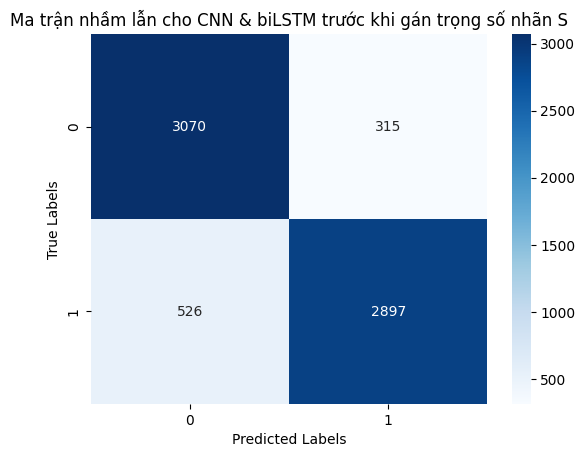

In [ ]:
le = LabelEncoder()
true_labels_encoded = le.fit_transform(y_true_labels)
predicted_labels_encoded = le.transform(y_pred_labels)

cm = confusion_matrix(true_labels_encoded, predicted_labels_encoded)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Ma trận nhầm lẫn cho biLSTM')
plt.show()